<a href="https://colab.research.google.com/github/akanshu11sharma/analysis_project/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving car data.csv to car data (2).csv
First 5 rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  

Summary Statistics:
              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.

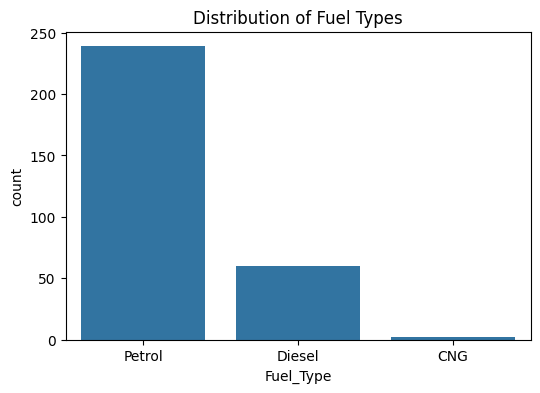

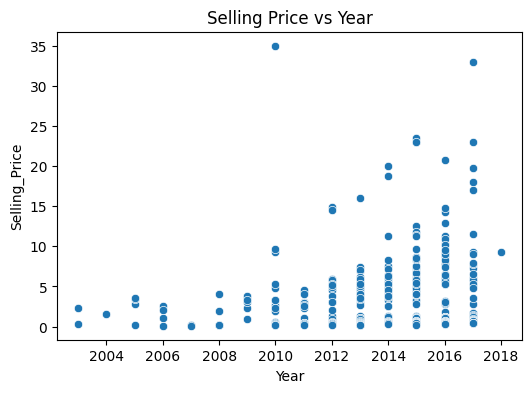

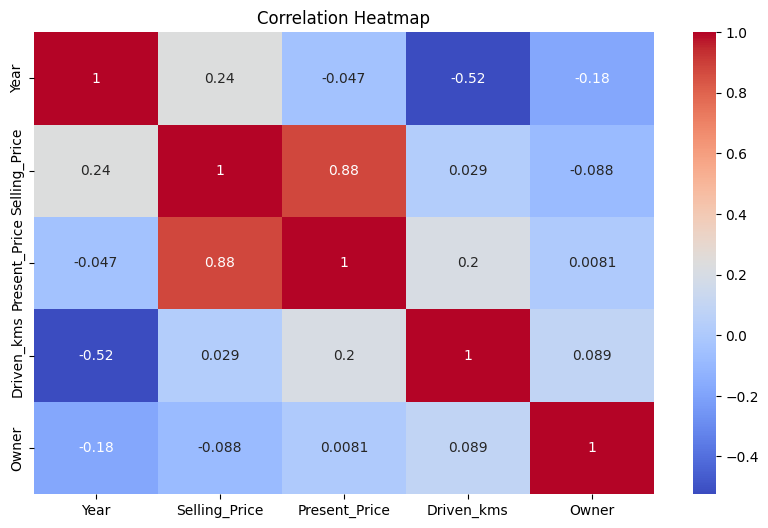

In [ ]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset (Upload in Colab manually or use below if running locally)
from google.colab import files
uploaded = files.upload()

# Read the CSV File
df = pd.read_csv('car data.csv')

# Display Basic Information
print("First 5 rows of the dataset:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

# Basic Data Cleaning (if required)
# For example: converting 'Year' column to int (if needed)
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop rows with missing values (optional)
df.dropna(inplace=True)

# Exploratory Data Analysis (EDA)
# Example: Countplot of Fuel Type
if 'Fuel_Type' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x='Fuel_Type')
    plt.title('Distribution of Fuel Types')
    plt.show()

# Price vs Year scatter plot
if 'Selling_Price' in df.columns and 'Year' in df.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x='Year', y='Selling_Price', data=df)
    plt.title('Selling Price vs Year')
    plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


R² Score: 0.5804620610809212
Mean Squared Error: 11.946007423550661


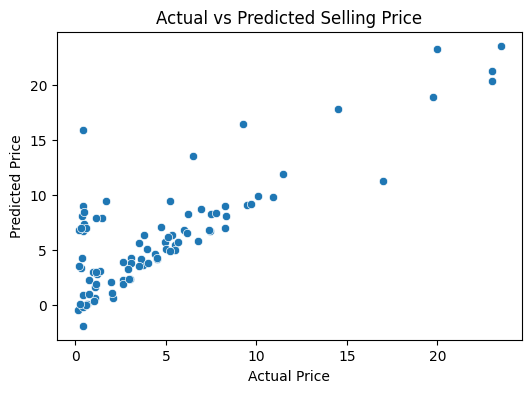

In [ ]:
# Convert categorical columns to numerical using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
plt.figure(figsize=(6,4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Selling Price")
plt.show()

